In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [4]:
df.shape

(103904, 25)

In [5]:
miss = df.isnull().sum()
miss


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
# Update the data cleaning code to avoid FutureWarning
median = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(median)





In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# i want to do eda process before prediction

C:\Users\User\AppData\Local\Temp\ipykernel_9096\4101461971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='satisfaction',palette='mako')


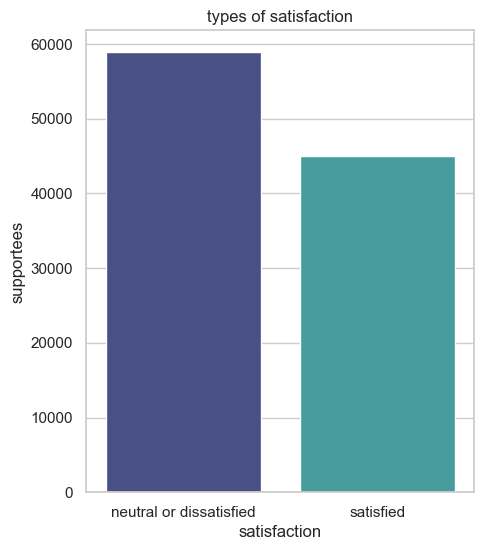

In [9]:
sns.set(style='whitegrid')


plt.figure(figsize=(5, 6))
sns.countplot(df, x='satisfaction',palette='mako')
legend=False
plt.title('types of satisfaction')
plt.xlabel('satisfaction')
plt.ylabel('supportees')
plt.show()



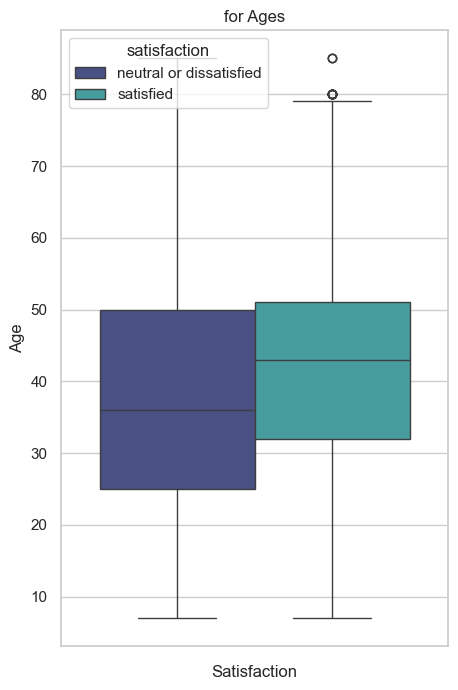

In [10]:
plt.figure(figsize=(5, 8))
sns.boxplot(df, hue='satisfaction', y='Age', palette='mako')
plt.title('for Ages')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()

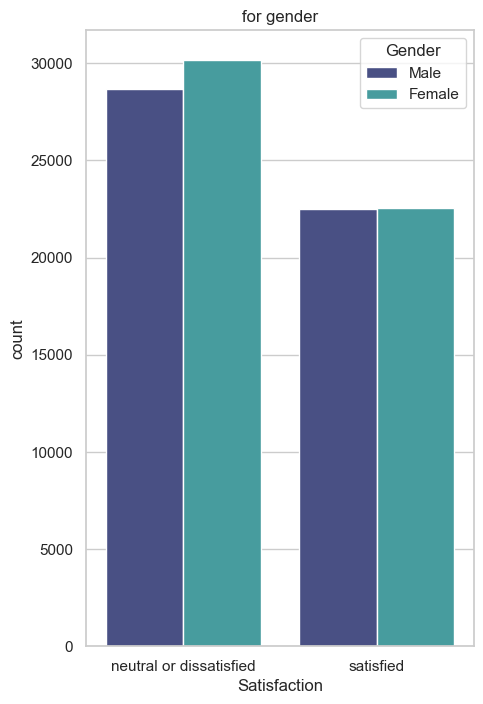

In [11]:
plt.figure(figsize=(5, 8))
sns.countplot(df, x='satisfaction', hue='Gender', palette='mako')
plt.title('for gender')
plt.xlabel('Satisfaction')
plt.show()

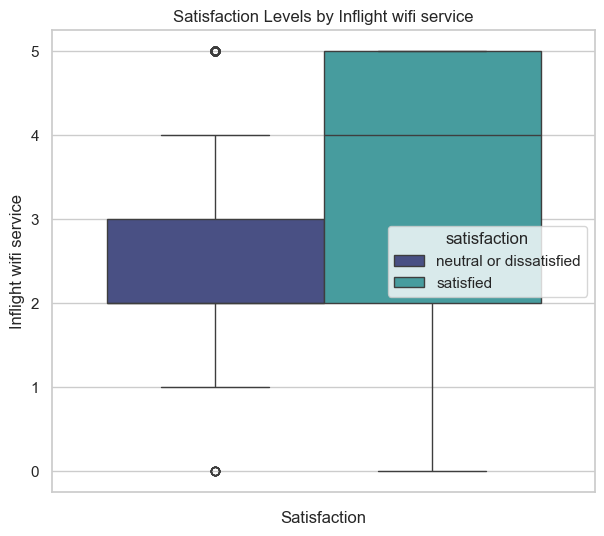

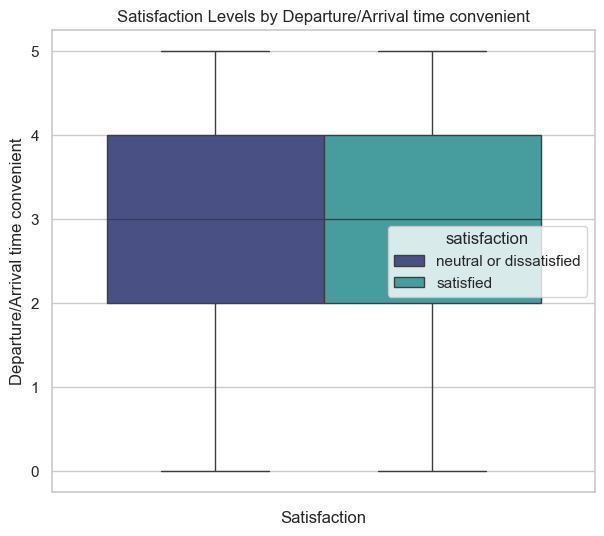

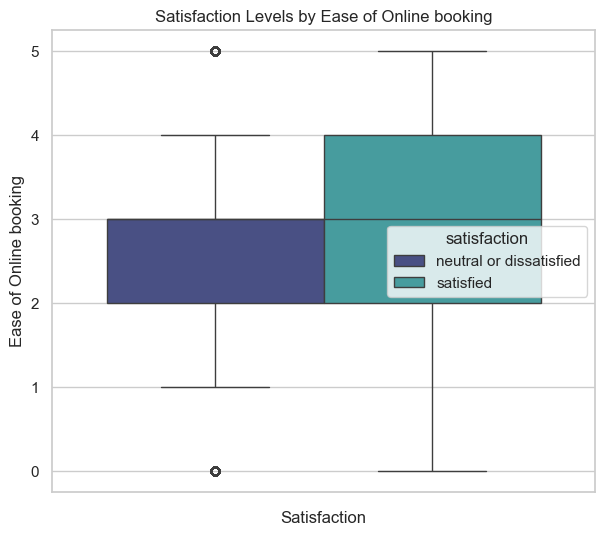

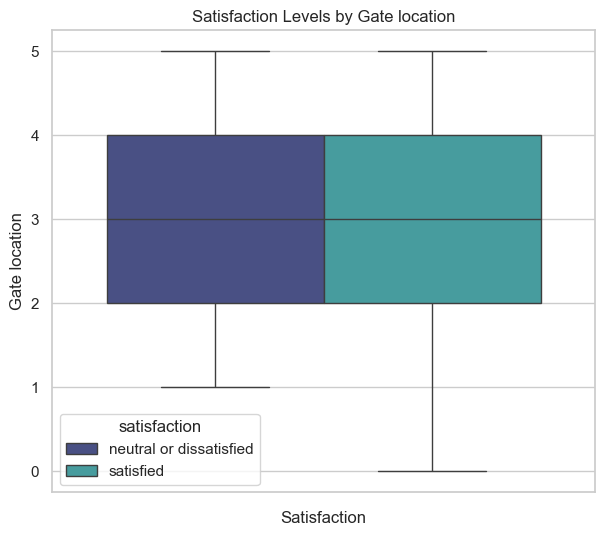

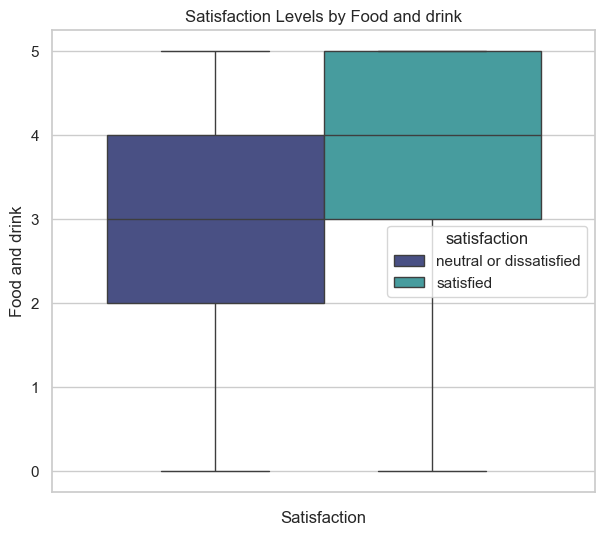

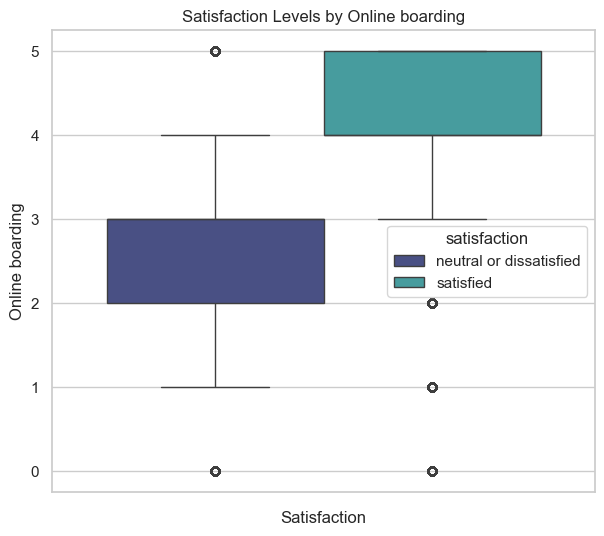

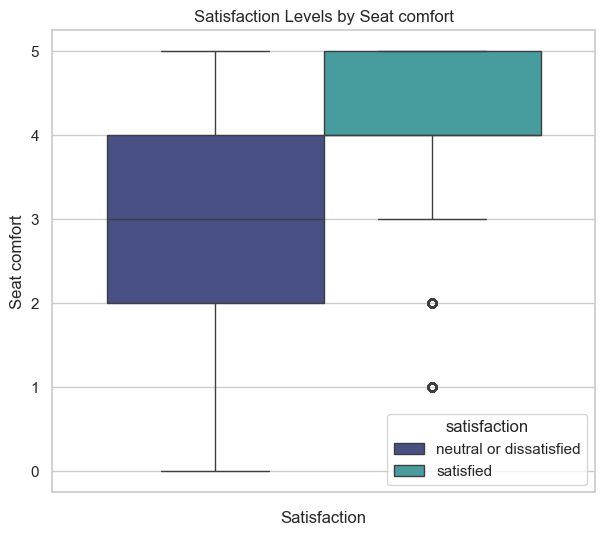

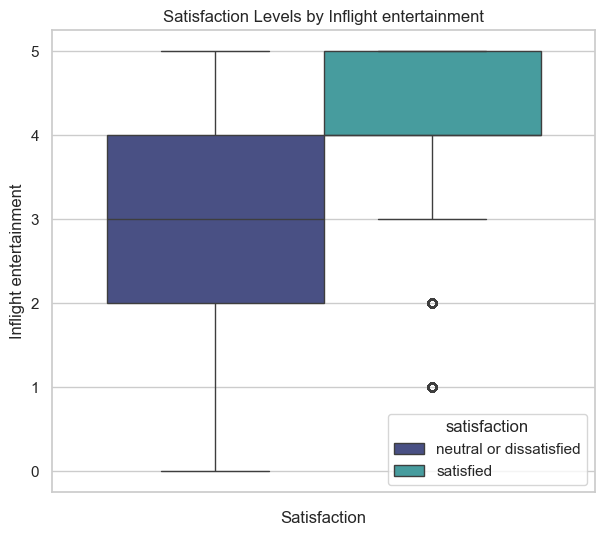

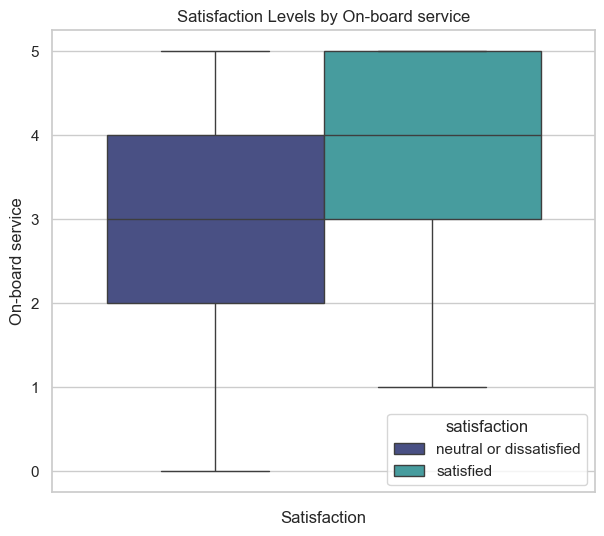

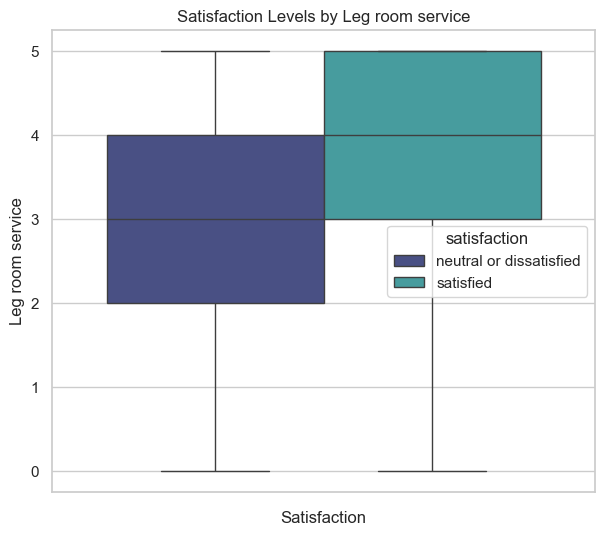

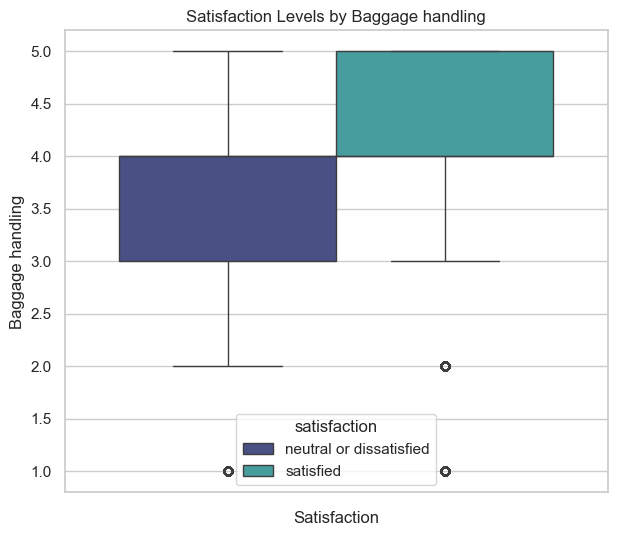

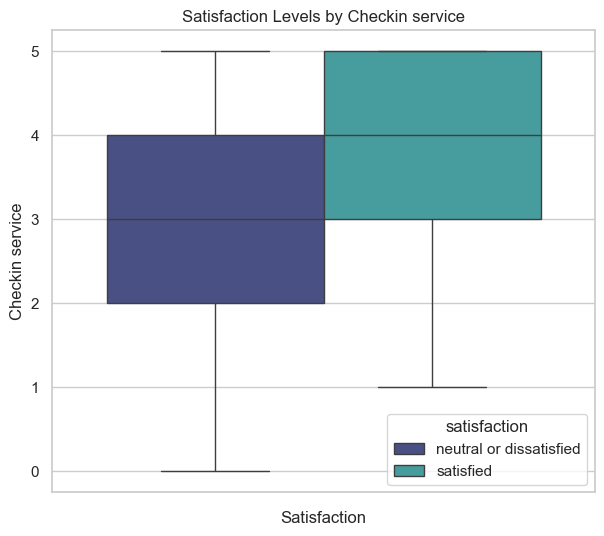

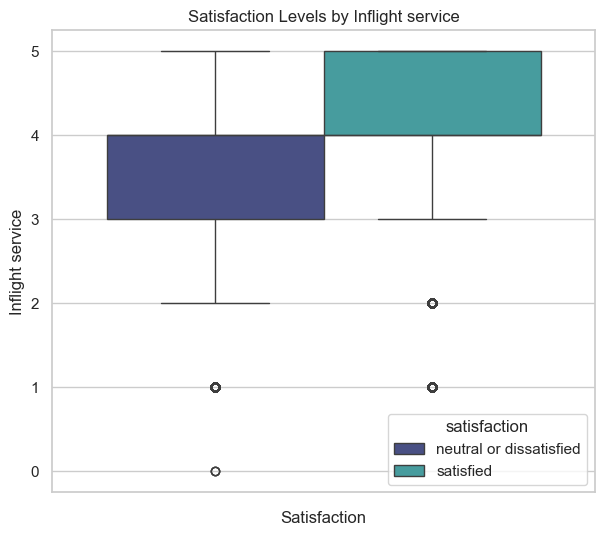

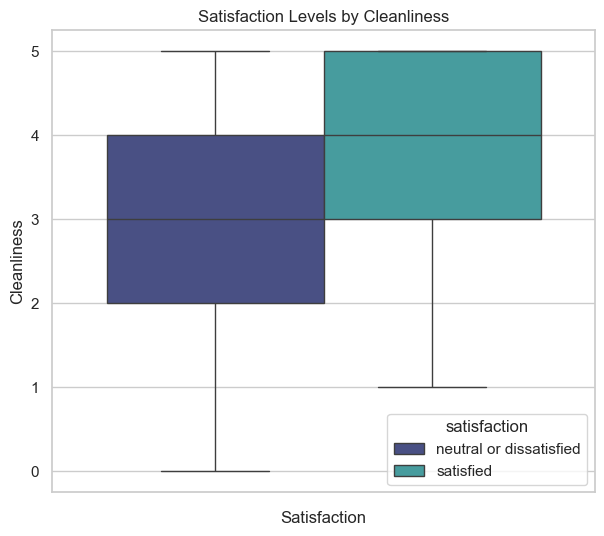

In [12]:
services = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
    'Inflight service', 'Cleanliness'
]

for column in services:
    plt.figure(figsize=(7, 6))
    sns.boxplot(df, hue='satisfaction', y=column, palette='mako',)
    legend=False
    plt.title(f'Satisfaction Levels by {column}')
    plt.xlabel('Satisfaction')
    plt.show()

In [13]:
# till this code i make a relationship every feature with Satistifaction now time to turning to Feature Enginerring

In [14]:
# so now i should classify my category columns

In [15]:
from sklearn.preprocessing import LabelEncoder


df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Customer Type'] = LabelEncoder().fit_transform(df['Customer Type'])
df['Type of Travel'] = LabelEncoder().fit_transform(df['Type of Travel'])
df['Class'] = LabelEncoder().fit_transform(df['Class'])
df['satisfaction'] = LabelEncoder().fit_transform(df['satisfaction'])# bunuda cevirdim amma butun hedefimiz bunu predict etmekdi
df.head(10)
# zero is neutral
# but one +

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,5,111157,0,0,26,1,1,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,0
6,6,82113,1,0,47,1,1,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,0
7,7,96462,0,0,52,0,0,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,1
8,8,79485,0,0,41,0,0,853,1,2,...,1,1,2,1,4,1,2,0,0.0,0
9,9,65725,1,1,20,0,1,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,0


In [16]:
# so we are going to do same thing on numerical, so that 10-30 years we can call as 1 and etc. And we have a popular function SCALER

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,-1.745279,1,2,-0.731539,3,4,...,5,4,3,4,4,5,5,0.266393,0.074169,0
1,1,5047,1,1,-0.951360,0,0,-0.957184,3,2,...,1,1,5,3,1,4,1,-0.361375,-0.236313,0
2,2,110028,0,0,-0.885200,0,0,-0.047584,2,2,...,5,4,3,4,4,4,5,-0.387532,-0.391554,1
3,3,24026,0,0,-0.951360,0,0,-0.629246,2,5,...,2,2,5,3,1,4,2,-0.099805,-0.158692,0
4,4,119299,1,0,1.430397,0,0,-0.978244,3,3,...,3,3,4,4,3,3,3,-0.387532,-0.391554,1


In [18]:
# in my mind, our data is ready, but if you need to drop  un  neccessary things just type drop axis=True or axis=1 

In [19]:
# cretaing model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # o qeder classlar eledim mence en yaxsi yol budu

X = df.drop(['satisfaction', 'Unnamed: 0', 'id'], axis = True)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.96
ROC-AUC Score: 0.99
Mean Squared Error (MSE): 0.04

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



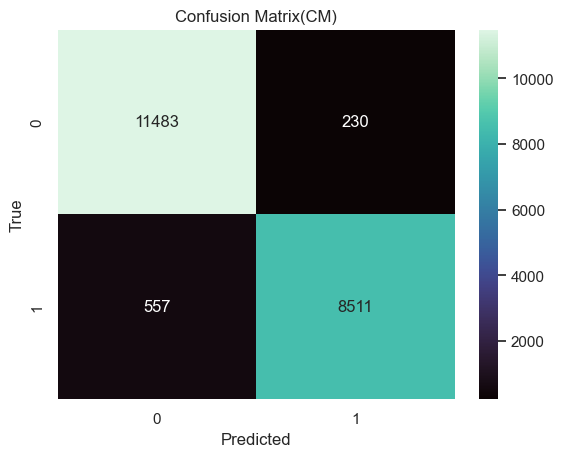

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

print()

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='mako')
plt.title('Confusion Matrix(CM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()